In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

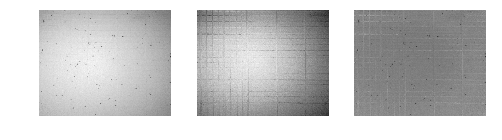

In [2]:
img = cv2.imread('tetra_ex.jpg', 0)
false = cv2.imread("empty_image.jpg", 0)
corrected = (img / false)

ims = [img, false, corrected]
fig = plt.figure(figsize=(8,11))
for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(ims[i], cmap='gray')
    ax.axis('off')
plt.show()

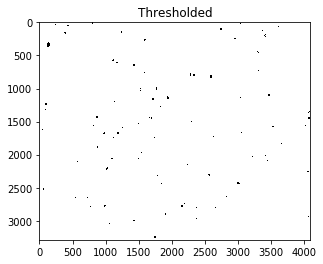

In [4]:
ret3,mask = cv2.threshold(corrected.astype('uint8'),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(mask, cmap="gray")
plt.title("Thresholded")
plt.show()

In [7]:
## threshold
th, threshed = cv2.threshold(255 - corrected.astype('uint8'), 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]


## filter by area
s1= 3
s2 = 20
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print(f"Number of dots: {len(xcnts)}")

Number of dots: 110


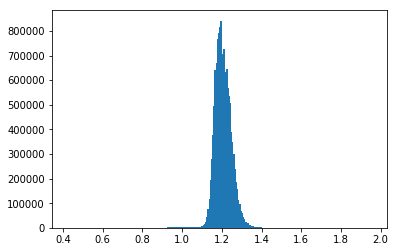

In [8]:
plt.hist(corrected.ravel(), bins=256)
plt.show()

In [9]:
# Test validity of the counted method
test = np.zeros_like(corrected)
num_components = 100
test.ravel()[np.random.randint(test.size, size=num_components)] = 255

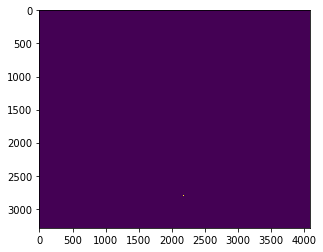

In [10]:
plt.imshow(test)

In [11]:
## threshold
th, threshed = cv2.threshold(test.astype('uint8'), 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]


## filter by area
s1= 1
s2 = 20
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print(f"Number of dots: {len(xcnts)}")

Number of dots: 100
